In [2]:
import numpy as np
import pandas as pd

In [3]:
print(np.__version__)
print(pd.__version__)

2.2.3
2.2.3


Data: House Prices


https://github.com/kshitizrohilla/house-price-prediction-using-simple-linear-regression/blob/main/data/house-prices.csv

In [95]:
dataset = pd.read_csv("house_prices.csv")
dataset.head()
# dataset = dataset.iloc[:100].copy()

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54


In [96]:
dataset.isna().sum()

area     0
price    0
dtype: int64

In [97]:
dataset.shape

(1000, 2)

In [90]:
def loss(m, b, dataset):
    error = 0
    total = dataset.shape[0]

    for i in range(total):
        x = dataset.iloc[i].area
        y = dataset.iloc[i].price

        calculated_value = m*x + b
        error += (y - calculated_value)**2
    
    error /= total
    return error
    

In [91]:
def gradient_descent(m, b, dataset, LR = 0.01):

    m_grad, b_grad = 0, 0
    total = dataset.shape[0]

    for i in range(total):
        x = dataset.iloc[i].area
        y = dataset.iloc[i].price

        
        m_grad += -(2/total) * x * (y - (m * x +b))
        b_grad += -(2/total)  * (y - (m * x +b))
        
    updated_m = m - m_grad * LR 
    updated_b = b - b_grad * LR

    return updated_m, updated_b



In [92]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

3.10.1


In [93]:
import random 
def train(epochs = 100, m = 1, b = 1, LR = 0.001):
    
    for _ in range(epochs):
        m, b = gradient_descent(m, b, dataset, LR)
        
        if _ % 10 == 0:
            loss_val = loss(m, b, dataset)
            print("epoch", _, "loss", loss_val)

    
    print("finished training")
    print(m, b)

    # plot the fitted line 

    # getting random 50 points in seq
    rnd = random.randint(1,950)
    start = rnd 
    end = rnd + 50

    plt.scatter(dataset.area, dataset.price)
    plt.plot(list(range(start, end)), [m * x + b for x in range(start, end)], color = "red")
    plt.show()


epoch 0 loss 5.464183835627995e+19
epoch 10 loss 4.687514383176485e+105
epoch 20 loss 4.021239357427595e+191
epoch 30 loss 3.449667488543653e+277
epoch 40 loss inf


/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_56120/2888613957.py:10: RuntimeWarning: overflow encountered in scalar power
  error += (y - calculated_value)**2
/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_56120/1067264923.py:11: RuntimeWarning: overflow encountered in scalar add
  m_grad += -(2/total) * x * (y - (m * x +b))
/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_56120/1067264923.py:11: RuntimeWarning: overflow encountered in scalar multiply
  m_grad += -(2/total) * x * (y - (m * x +b))
/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_56120/1067264923.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  updated_m = m - m_grad * LR


epoch 50 loss inf
epoch 60 loss inf
epoch 70 loss inf
epoch 80 loss nan
epoch 90 loss nan
finished training
nan nan


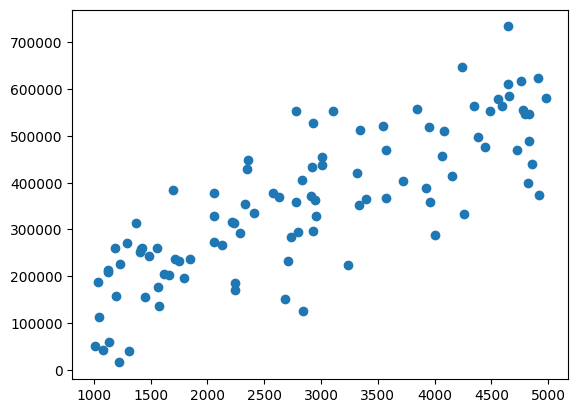

In [94]:
train()

In [23]:
dataset.shape[0]

1000